<a href="https://colab.research.google.com/github/SimranShaikh20/ISRO_Mining_Site_FINAL_APP/blob/main/ChartforRocksClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Add more charts for better uderstanding for Rocks Classification

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Enable inline plotting for matplotlib
%matplotlib inline

# Create a sample dataset for rock classification
np.random.seed(0)
n_samples = 1000

data = {
    "Rock_Type": np.random.choice(["Igneous", "Sedimentary", "Metamorphic"], n_samples),
    "Silica_Content": np.random.uniform(40, 80, n_samples),
    "Feldspar_Content": np.random.uniform(0, 60, n_samples),
    "Quartz_Content": np.random.uniform(0, 60, n_samples),
    "Grain_Size": np.random.uniform(0, 5, n_samples),
    "Specific_Gravity": np.random.uniform(2.5, 3.5, n_samples),
    "Hardness": np.random.uniform(1, 10, n_samples),
}

df = pd.DataFrame(data)

# 1. Scatter Plot: Silica vs Feldspar Content
fig = px.scatter(
    df,
    x="Silica_Content",
    y="Feldspar_Content",
    color="Rock_Type",
    hover_data=["Quartz_Content"],
    title="Silica vs Feldspar Content by Rock Type",
)
fig.show()

In [11]:
# 2. Ternary Plot: Silica, Feldspar, and Quartz Content
fig = px.scatter_ternary(
    df,
    a="Silica_Content",
    b="Feldspar_Content",
    c="Quartz_Content",
    color="Rock_Type",
    hover_name="Rock_Type",
    title="Ternary Plot of Rock Composition",
)
fig.show()

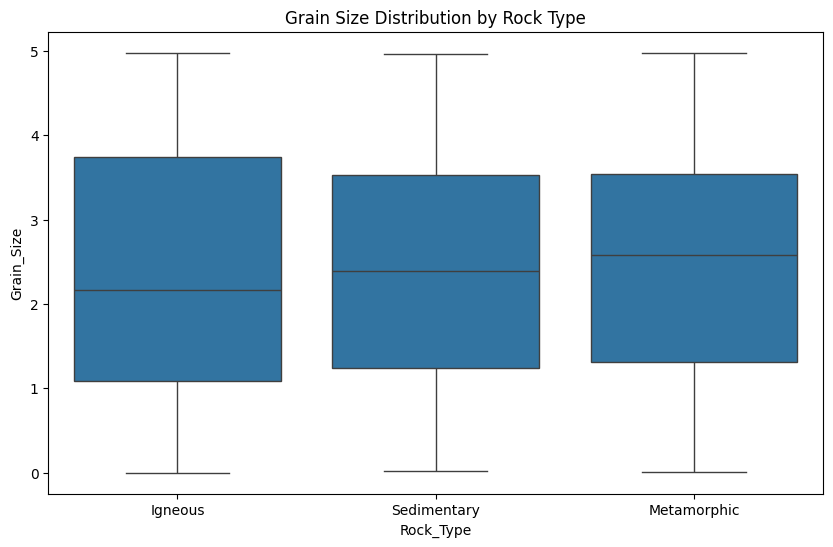

In [12]:
# 3. Box Plot: Grain Size Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x="Rock_Type", y="Grain_Size", data=df)
plt.title("Grain Size Distribution by Rock Type")
plt.show()

In [13]:
# 4. Histogram: Specific Gravity Distribution
fig = px.histogram(
    df,
    x="Specific_Gravity",
    color="Rock_Type",
    nbins=30,
    title="Distribution of Specific Gravity by Rock Type",
)
fig.show()

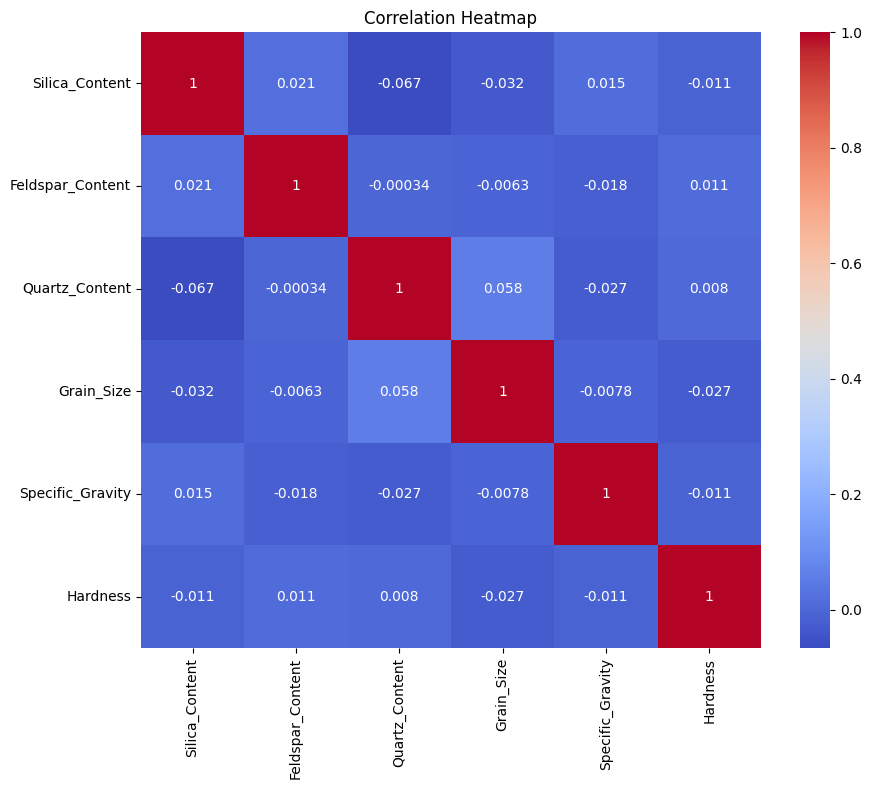

In [14]:
# 5. Heatmap: Correlation between features
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# 6. 3D Scatter Plot: Silica, Feldspar, and Hardness
fig = px.scatter_3d(
    df,
    x="Silica_Content",
    y="Feldspar_Content",
    z="Hardness",
    color="Rock_Type",
    hover_name="Rock_Type",
    title="3D Scatter Plot: Silica, Feldspar, and Hardness",
)
fig.show()

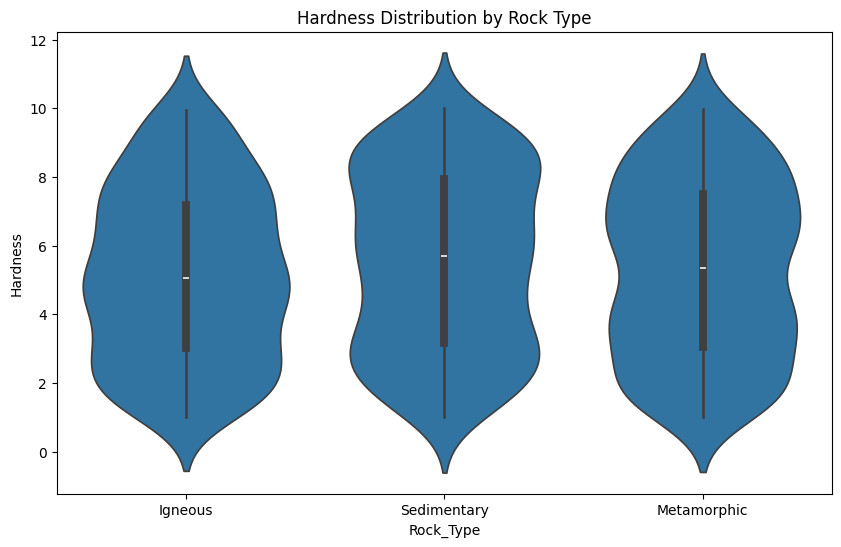

In [16]:
# 7. Violin Plot: Hardness Distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x="Rock_Type", y="Hardness", data=df)
plt.title("Hardness Distribution by Rock Type")
plt.show()

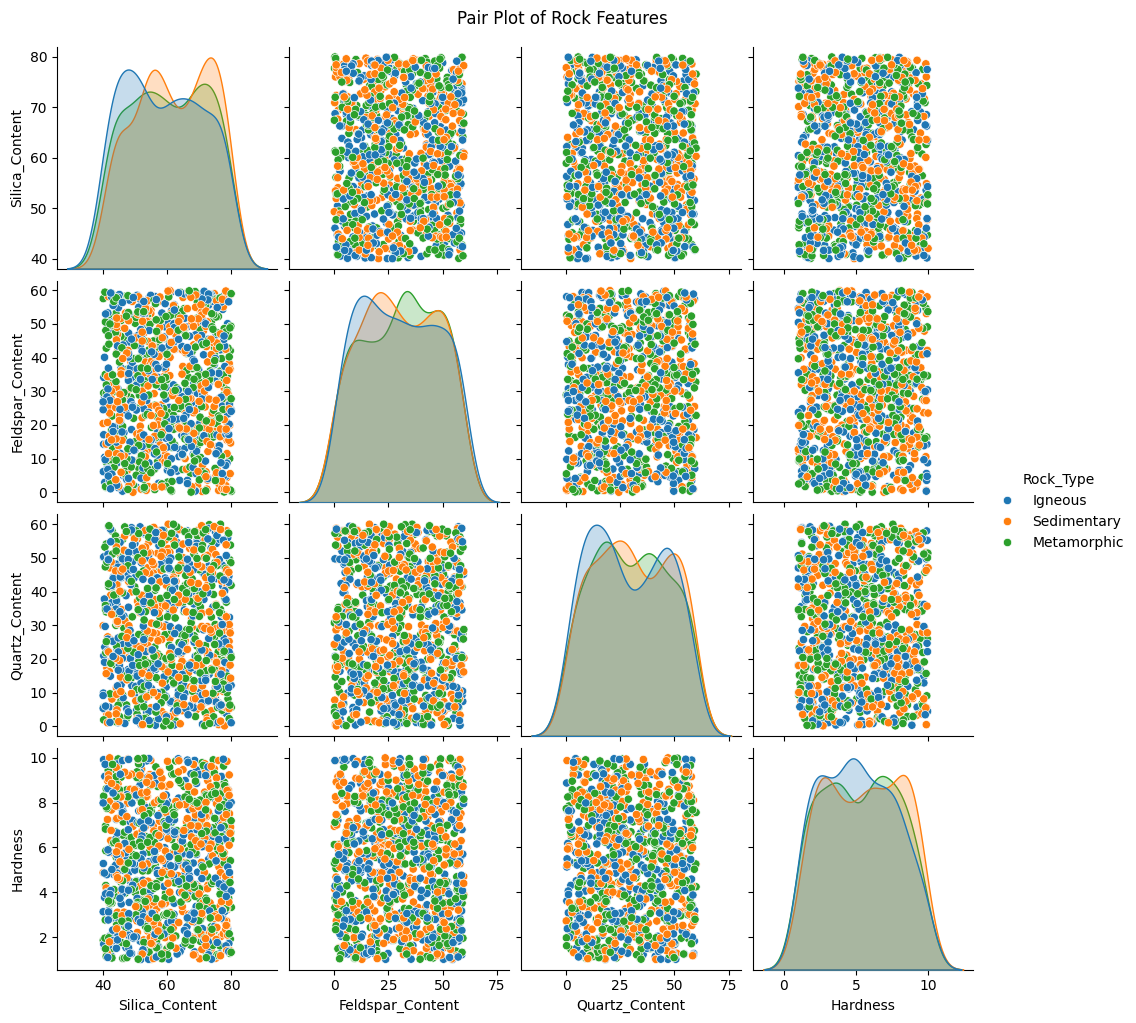

In [17]:
# 8. Pair Plot: Relationships between numeric features
sns.pairplot(
    df,
    hue="Rock_Type",
    vars=["Silica_Content", "Feldspar_Content", "Quartz_Content", "Hardness"],
)
plt.suptitle("Pair Plot of Rock Features", y=1.02)
plt.show()

In [18]:
# 9. Stacked Bar Chart: Average Composition by Rock Type
composition_data = df.groupby("Rock_Type")[
    ["Silica_Content", "Feldspar_Content", "Quartz_Content"]
].mean()

fig = go.Figure(
    data=[
        go.Bar(
            name="Silica",
            x=composition_data.index,
            y=composition_data["Silica_Content"],
        ),
        go.Bar(
            name="Feldspar",
            x=composition_data.index,
            y=composition_data["Feldspar_Content"],
        ),
        go.Bar(
            name="Quartz",
            x=composition_data.index,
            y=composition_data["Quartz_Content"],
        ),
    ]
)

fig.update_layout(
    barmode="stack",
    title="Average Composition by Rock Type",
    xaxis_title="Rock Type",
    yaxis_title="Percentage",
    legend_title="Mineral",
)

fig.show()